In [1]:
#6.1.1 LeNet

In [2]:
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout

In [3]:
num_classes = 2
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [4]:
model = LeNet((100, 100, 3), num_classes)
model.summary()

Model: "le_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8464)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               1015800   
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

In [5]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "../chap6/data/catanddog/train/"
valid_dir = "../chap6/data/catanddog/validation/"

In [6]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [7]:
log_dir="../chap6/img/log6-1/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 0)

In [8]:
model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_num // BATCH_SIZE,
                    validation_data=valid_generator,
                    validation_steps=valid_num // BATCH_SIZE,
                    callbacks=[tensorboard_callback],
                    verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 179ms/step - loss: 0.7516 - accuracy: 0.5241 - val_loss: 0.7342 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 2s 162ms/step - loss: 0.7448 - accuracy: 0.4674 - val_loss: 0.6929 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 2s 171ms/step - loss: 0.6926 - accuracy: 0.5354 - val_loss: 0.6929 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 2s 197ms/step - loss: 0.6923 - accuracy: 0.5467 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 2s 207ms/step - loss: 0.6904 - accuracy: 0.5439 - val_loss: 0.6907 - val_accuracy: 0.4583
Epoch 6/100
12/12 [==============================] - 3s 218ms/step - loss: 0.6977 - accuracy: 0.5694 - val_loss: 0.6903 - val_accuracy: 0.5104
Epoch 7/100
12/12 [==============================] - 3s 210ms/step - loss: 0.6944 - accuracy: 0.5469 - val_loss: 0.6883 - val_accuracy: 0.5312

Epoch 58/100
12/12 [==============================] - 3s 249ms/step - loss: 0.3940 - accuracy: 0.8045 - val_loss: 0.7968 - val_accuracy: 0.6354
Epoch 59/100
12/12 [==============================] - 2s 196ms/step - loss: 0.4036 - accuracy: 0.8159 - val_loss: 0.9157 - val_accuracy: 0.6458
Epoch 60/100
12/12 [==============================] - 2s 188ms/step - loss: 0.3403 - accuracy: 0.8357 - val_loss: 0.8975 - val_accuracy: 0.6354
Epoch 61/100
12/12 [==============================] - 3s 227ms/step - loss: 0.3553 - accuracy: 0.8300 - val_loss: 0.9516 - val_accuracy: 0.6667
Epoch 62/100
12/12 [==============================] - 4s 303ms/step - loss: 0.3572 - accuracy: 0.8187 - val_loss: 0.9956 - val_accuracy: 0.6771
Epoch 63/100
12/12 [==============================] - 4s 307ms/step - loss: 0.4714 - accuracy: 0.7790 - val_loss: 0.9616 - val_accuracy: 0.5729
Epoch 64/100
12/12 [==============================] - 3s 228ms/step - loss: 0.4206 - accuracy: 0.7875 - val_loss: 0.9013 - val_accuracy:

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


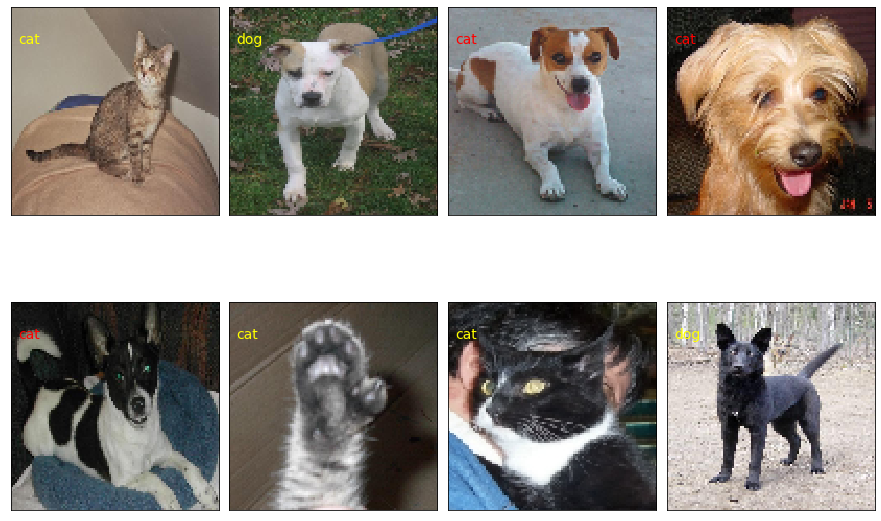

In [9]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
      
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [10]:
#6.1.3 AlexNet

In [11]:
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
num_classes = 2
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [13]:
model = AlexNet((100, 100, 3), num_classes)
model.summary()

Model: "alex_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 23, 23, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 384)         885120    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 384)         1327488   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 256)         884

In [14]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "../chap6/data/catanddog/train/"
valid_dir = "../chap6/data/catanddog/validation/"

In [15]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [16]:
log_dir="../chap6/img/log6-2/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 0)

In [17]:
model.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_num // BATCH_SIZE,
                    validation_data=valid_generator,
                    validation_steps=valid_num // BATCH_SIZE,
                    callbacks=[tensorboard_callback],
                    verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 594ms/step - loss: 11.0654 - accuracy: 0.4561 - val_loss: 0.7079 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 8s 646ms/step - loss: 0.6976 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 8s 644ms/step - loss: 0.7006 - accuracy: 0.4674 - val_loss: 0.6927 - val_accuracy: 0.5104
Epoch 4/100
12/12 [==============================] - 8s 681ms/step - loss: 0.7012 - accuracy: 0.5042 - val_loss: 0.6998 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 8s 668ms/step - loss: 0.6896 - accuracy: 0.5326 - val_loss: 0.6966 - val_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 8s 645ms/step - loss: 0.6907 - accuracy: 0.5354 - val_loss: 0.6931 - val_accuracy: 0.5104
Epoch 7/100
12/12 [==============================] - 8s 669ms/step - loss: 0.6923 - accuracy: 0.5269 - val_loss: 0.6938 - val_accuracy: 0.489

Epoch 58/100
12/12 [==============================] - 7s 620ms/step - loss: 0.6943 - accuracy: 0.4816 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 59/100
12/12 [==============================] - 7s 619ms/step - loss: 0.6927 - accuracy: 0.5269 - val_loss: 0.6930 - val_accuracy: 0.5104
Epoch 60/100
12/12 [==============================] - 8s 651ms/step - loss: 0.6966 - accuracy: 0.5269 - val_loss: 0.6981 - val_accuracy: 0.5000
Epoch 61/100
12/12 [==============================] - 7s 611ms/step - loss: 0.6901 - accuracy: 0.5326 - val_loss: 0.6943 - val_accuracy: 0.4896
Epoch 62/100
12/12 [==============================] - 8s 626ms/step - loss: 0.6925 - accuracy: 0.5184 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 63/100
12/12 [==============================] - 8s 626ms/step - loss: 0.6964 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 64/100
12/12 [==============================] - 8s 637ms/step - loss: 0.6951 - accuracy: 0.4844 - val_loss: 0.6920 - val_accuracy:

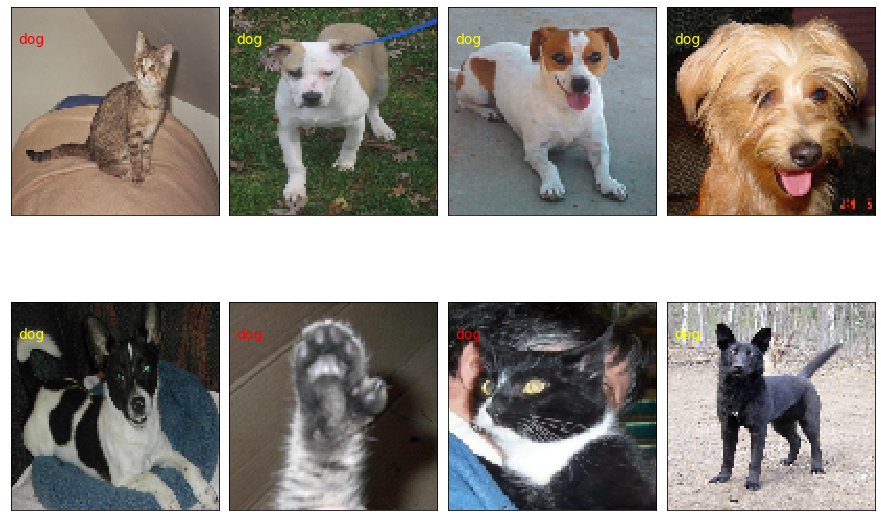

In [18]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
  
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [19]:
#6.1.4 VGGNet

In [20]:
#pip install opencv-python
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [21]:
class VGG19(Sequential):
    def __init__(self, input_shape):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu', input_shape= input_shape))
        self.add(Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides= (2,2)))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dropout(0.5))
        self.add(Dense(1000, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.003),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [22]:
model = VGG19(input_shape=(224, 224, 3))
model.summary()

Model: "vg_g19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 256)       29516

In [23]:
# vgg19_weights_tf_dim_ordering_tf_kernels.h5 파일은 깃허브 Readme 파일에 안내된 링크에서 내려받아 chap6 > data 폴더에 넣어주세요.

model.load_weights("../chap6/data/vgg19_weights_tf_dim_ordering_tf_kernels.h5")

In [24]:
classes= {282: 'cat',
 681: 'notebook, notebook computer',
 970: 'alp'}

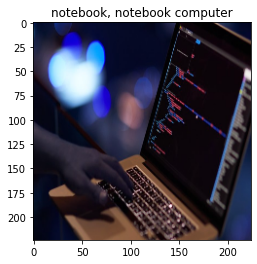

In [25]:
image1=cv2.imread('../chap6/data/labtop.jpg')
#image1=cv2.imread('../chap6/data/starrynight.jpeg')
#image1=cv2.imread('../chap6/data/cat.jpg')
image1 = cv2.resize(image1, (224, 224))
plt.figure()
plt.imshow(image1)
image1 = image1[np.newaxis, :]
predicted_value = model.predict(image1)
predicted_value = np.argmax(predicted_value)
plt.title(classes[predicted_value])

In [26]:
#6.1.6 ResNset

In [27]:
def res_identity(x, filters): 
  x_skip = x 
  f1, f2 = filters

  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [28]:
def res_conv(x, s, filters):
  x_skip = x
  f1, f2 = filters

  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x)
  # when s = 2 then it is like downsizing the feature map
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)
 
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x